## Objective

What are the top 10 most expensive brands?

Which brands have wide price distribution?

Do unavailability of an item affect its price? 

Which brand is listed the most?


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df_18 = pd.read_csv('data/Datafiniti_Womens_Shoes.csv')
df_19 = pd.read_csv('data/Datafiniti_Womens_Shoes_Jun19.csv')

## Data Preprocessing and Cleaning

In [5]:
df_18.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [6]:
df_19.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.dateSeen,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,2019-04-19T07:09:29Z,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,2019-04-24T09:14:11Z,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,2019-04-25T12:35:00.000Z,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,NaN,884000000000,...,2019-04-30T19:49:00.000Z,NaN,NaN,Online only: 20% off,NaN,NaN,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,NaN,887000000000,...,2019-04-19T07:07:46Z,NaN,NaN,Online only: 50% off,NaN,NaN,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...


In [7]:
print(df_18.columns)
print(len(df_18.columns))

Index(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories',
       'primaryCategories', 'colors', 'dimension', 'ean', 'imageURLs', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'prices.amountMax',
       'prices.amountMin', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.currency', 'prices.dateAdded',
       'prices.dateSeen', 'prices.isSale', 'prices.merchant', 'prices.offer',
       'prices.returnPolicy', 'prices.shipping', 'prices.size',
       'prices.sourceURLs', 'sizes', 'sourceURLs', 'upc', 'weight'],
      dtype='object')
34


In [8]:
print(df_19.columns)
print(len(df_19.columns))

Index(['id', 'dateAdded', 'dateUpdated', 'asins', 'brand', 'categories',
       'primaryCategories', 'colors', 'dimension', 'ean / upc', 'imageURLs',
       'keys', 'manufacturer', 'manufacturerNumber', 'name',
       'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.color', 'prices.condition', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.sourceURLs', 'sizes',
       'sourceURLs'],
      dtype='object')
32


In [9]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
id                     10000 non-null object
dateAdded              10000 non-null object
dateUpdated            10000 non-null object
asins                  3 non-null object
brand                  10000 non-null object
categories             10000 non-null object
primaryCategories      10000 non-null object
colors                 2631 non-null object
dimension              117 non-null object
ean                    671 non-null float64
imageURLs              10000 non-null object
keys                   10000 non-null object
manufacturer           527 non-null object
manufacturerNumber     2482 non-null object
name                   10000 non-null object
prices.amountMax       10000 non-null float64
prices.amountMin       10000 non-null float64
prices.availability    434 non-null object
prices.color           10000 non-null object
prices.condition       438 non-null object
price

### Columns Desc

ean / upc is barcode

asin is standard id

keys are the product keys

In [10]:
dropped_columns_18 = ['ean', 'upc', 'asins','keys']

In [11]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
id                     10000 non-null object
dateAdded              10000 non-null object
dateUpdated            10000 non-null object
asins                  5 non-null object
brand                  10000 non-null object
categories             10000 non-null object
primaryCategories      10000 non-null object
colors                 10000 non-null object
dimension              465 non-null object
ean / upc              10000 non-null int64
imageURLs              2643 non-null object
keys                   10000 non-null object
manufacturer           1362 non-null object
manufacturerNumber     1431 non-null object
name                   10000 non-null object
prices.amountMax       10000 non-null float64
prices.amountMin       10000 non-null float64
prices.availability    10000 non-null bool
prices.color           10000 non-null object
prices.condition       0 non-null float64
price

In [12]:
dropped_columns_19 = ['ean / upc', 'asins', 'keys']

In [13]:
df_18.drop(dropped_columns_18, axis=1, inplace=True)

In [14]:
df_19.drop(dropped_columns_19, axis=1, inplace=True)

In [15]:
df_18.drop(['weight'], axis=1, inplace=True)

In [16]:
df_18.columns == df_19.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
df_all = pd.concat([df_18, df_19])

In [18]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 29 columns):
id                     20000 non-null object
dateAdded              20000 non-null object
dateUpdated            20000 non-null object
brand                  20000 non-null object
categories             20000 non-null object
primaryCategories      20000 non-null object
colors                 12631 non-null object
dimension              582 non-null object
imageURLs              12643 non-null object
manufacturer           1889 non-null object
manufacturerNumber     3913 non-null object
name                   20000 non-null object
prices.amountMax       20000 non-null float64
prices.amountMin       20000 non-null float64
prices.availability    10434 non-null object
prices.color           20000 non-null object
prices.condition       438 non-null object
prices.currency        20000 non-null object
prices.dateAdded       9223 non-null object
prices.dateSeen        20000 non-null obje

In [19]:
# too many missing values, currency is redundant as all in USD
dropped_columns = ['dimension','prices.condition','prices.merchant','prices.returnPolicy','prices.shipping', 'prices.currency']

In [20]:
df_all = df_all.drop(dropped_columns, axis=1)

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 23 columns):
id                     20000 non-null object
dateAdded              20000 non-null object
dateUpdated            20000 non-null object
brand                  20000 non-null object
categories             20000 non-null object
primaryCategories      20000 non-null object
colors                 12631 non-null object
imageURLs              12643 non-null object
manufacturer           1889 non-null object
manufacturerNumber     3913 non-null object
name                   20000 non-null object
prices.amountMax       20000 non-null float64
prices.amountMin       20000 non-null float64
prices.availability    10434 non-null object
prices.color           20000 non-null object
prices.dateAdded       9223 non-null object
prices.dateSeen        20000 non-null object
prices.isSale          11364 non-null object
prices.offer           10121 non-null object
prices.size            20000 non-null 

## Cleaning

### Quality

prices.availability has different value for in stock or out of stock, need to convert to true or false or blank
```
True, TRUE, In Stock = 1
False, Out Of Stock = 0
nan = -1
```

brand is messy, the ocolumn has values which point to the same brand but different capital letters or spelling, need to convert them into consistent naming

prices.amountMax and prices.amountMin seems to contain outliers which set price at 5000 and 999.99, we will remove these

Some columns contain missing values, however, since we are not using them we will leave them as is

### Tidiness

categories, color and sizes contain comma separated values. These columns need to be separated if we want to evaluate them

In [22]:
df_clean = df_all.copy()

In [23]:
df_all.sample(50)

,id,dateAdded,dateUpdated,brand,categories,primaryCategories,colors,imageURLs,manufacturer,manufacturerNumber,...,prices.availability,prices.color,prices.dateAdded,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs
6414,AV-9huDJYSSHbkXwpyJO,2017-11-15T02:33:29Z,2018-02-01T07:33:40Z,journee collection,"Womens,Shoes,Pumps,Heels,Journee Collection",Shoes,NaN,https://media.kohlsimg.com/is/image/kohls/2688...,NaN,NaN,...,NaN,Pink,2018-01-28T04:59:59Z,"2018-01-15T15:21:00.000Z,2018-01-14T13:10:00.0...",False,NaN,11,https://www.kohls.com/product/prd-2688916/jour...,"6,6.5,7,7.5,8,8.5,9,10,11",https://www.kohls.com/product/prd-2688916/jour...
9325,AV-KMp0rHh53nbDR_Kps,2017-11-05T03:20:43Z,2018-02-01T07:34:48Z,easy street,"Womens,Shoes,Sandals,Easy Street,Clothing,Wome...",Shoes,"Ivory,Navy,Black,Brown,Gray,Grey,Dark Tan,Navy...",https://media.kohlsimg.com/is/image/kohls/2792...,NaN,30-5124,...,NaN,Ivory,2018-02-01T07:34:48Z,"2018-01-16T10:37:00.000Z,2018-01-17T12:30:00.0...",False,NaN,7 WIDE,https://www.kohls.com/product/prd-2792675/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792675/easy...
9774,AWKb4X-rHh53nbDRIgXF,2018-04-06T16:45:48Z,2018-04-10T19:39:37Z,Frye,"Women's Footwear,Women's Casual Boots & Shoes,...",Shoes,"Wood,Cashew,Fatigue",https://content.backcountry.com/images/items/9...,NaN,FRY00BM,...,TRUE,Fatigue,NaN,2018-04-09T23:00:00Z,True,50%,11,https://www.backcountry.com/frye-sienna-ballet...,"6.0,6.5,7.0,7.5,8.5,9.0,9.5,10.0,11.0,8.0",https://www.backcountry.com/frye-sienna-ballet...
1835,AWpT2eUSM263mwCq8pRQ,2019-04-25T09:11:12Z,2019-04-25T09:11:12Z,Stuart Weitzman,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Topo,NaN,NaN,NaN,...,True,Topo,NaN,2019-04-25T09:11:12Z,NaN,Online only: 65% off,5.5 M,https://www.walmart.com/ip/Stuart-Weitzman-Mit...,5.5 M,https://www.walmart.com/ip/Stuart-Weitzman-Mit...
586,AV-ncGQTuC1rwyj_geid,2017-11-10T19:33:30Z,2018-02-01T07:34:25Z,dolce by mojo moxy,"Womens,Shoes,Clogs,Mules,Dolce by Mojo Moxy",Shoes,NaN,https://media.kohlsimg.com/is/image/kohls/2962...,NaN,NaN,...,NaN,Black,2018-01-02T17:26:47Z,"2017-12-19T09:38:00.000Z,2017-12-18T12:30:00.0...",False,NaN,11 MED,https://www.kohls.com/product/prd-2962763/dolc...,"6 MED,6.5 MED,7 MED,7.5 MED,8 MED,8.5 MED,9 ME...",https://www.kohls.com/product/prd-2962763/dolc...
9333,AVpimk8HLJeJML43nQKh,2015-11-16T16:50:06Z,2019-04-12T07:08:30Z,Brinley Co.,"Women's Boots,Womens Shoes,Clothing,Women's Sh...",Shoes,"Brown,Chestnut,Black",https://i5.walmartimages.com/asr/16173eb5-2f6c...,Brinley Co,MOLLY-BRN-070,...,False,Black,NaN,"2019-04-06T08:00:00Z,2019-04-07T08:00:00Z",False,Was 59.99,6.5,https://www.walmart.com/ip/Women-s-Round-Toe-B...,"6,7,8,9,6.5,7.5,8.5,10",https://www.walmart.com/ip/Brinley-Co-Womens-R...
2223,AV-nbbEYKZqtpbFMSzOi,2017-11-10T19:33:45Z,2018-01-29T04:27:58Z,croft barrow,"Womens,Shoes,Athletic Shoes,Sneakers,Croft,Barrow",Shoes,NaN,https://media.kohlsimg.com/is/image/kohls/2906...,NaN,NaN,...,NaN,Black,2018-01-02T15:38:05Z,"2017-12-18T13:03:00.000Z,2017-12-24T14:54:00.0...",False,NaN,7,https://www.kohls.com/product/prd-2906020/crof...,"7.5,8,8.5,9,9.5,10,6,6.5,7,11",https://www.kohls.com/product/prd-2906020/crof...
1784,AWpXeYsu0U_gzG0hhqem,2019-04-26T02:03:09Z,2019-04-26T02:03:28Z,Fuzzy,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,NaN,NaN,...,True,Black,NaN,2019-04-21T09:57:16Z,NaN,Online only,8 W,https://www.walmart.com/ip/FUZZY-Anita-Women-s...,8 W,https://www.walmart.com/ip/FUZZY-Anita-Women-s...
9283,AV-XClqdHh53nbDR_SiY,2017-11-07T15:08:55Z,2018-02-01T07:32:58Z,easy street,"Womens,Shoes,Sandals,Easy Street,Clothing,Wome...",Shoes,"Black,Pewter,White,Gray,Beige,Tan,Navy Synthet...",https://media.kohlsimg.com/is/image/kohls/2791...,NaN,30-4765,...,NaN,White,2018-02-01T07:32:58Z,"2018-01-16T07:35:00.000Z,2018-01-18T10:17:00.0...",False,NaN,6.5 MED,https://www.kohls.com/product/prd-2791060/easy...,"5 MED,5.5 MED,6 M

In [24]:
df_all['id'].nunique()

9386

In [25]:
df_all['id']

0       AVpfEf_hLJeJML431ueH
1       AVpi74XfLJeJML43qZAc
2       AVpi74XfLJeJML43qZAc
3       AVpjXyCc1cnluZ0-V-Gj
4       AVphGKLPilAPnD_x1Nrm
5       AVpg91ziilAPnD_xziOo
6       AVpjGKXyLJeJML43r8BH
7       AVpjGKXyLJeJML43r8BH
8       AVpfLXyhilAPnD_xWmNc
9       AVpfeWdJ1cnluZ0-lXYU
10      AVpfeWdJ1cnluZ0-lXYU
11      AVpf38PKLJeJML43FRwO
12      AVph9abqilAPnD_x_Nrp
13      AVph9abqilAPnD_x_Nrp
14      AVpgNGD6ilAPnD_xpAke
15      AVpgBzl41cnluZ0-vSQf
16      AVpgBzl41cnluZ0-vSQf
17      AVpgBzl41cnluZ0-vSQf
18      AVpivUm2ilAPnD_xHGfN
19      AVpivUm2ilAPnD_xHGfN
20      AV_NPBzfHh53nbDRAFPa
21      AVpfGWT3ilAPnD_xU7MQ
22      AVphXIhELJeJML43Z-74
23      AVphX0ZbLJeJML43aHNG
24      AVpjDTKT1cnluZ0-TF44
25      AVphf6M51cnluZ0-DNIG
26      AVpfk-Q81cnluZ0-nUsT
27      AV-ncxniKZqtpbFMS0GX
28      AV-ncxniKZqtpbFMS0GX
29      AV14CA98vKc47QAVnx6N
                ...         
9970    AVpfZKMY1cnluZ0-j-0e
9971    AVpfZKMY1cnluZ0-j-0e
9972    AVpfZKMY1cnluZ0-j-0e
9973    AVpfZK

In [26]:
df_all[df_all['id'] == 'AVpfZKMY1cnluZ0-j-0e'].filter(regex=('prices.*'))

,prices.amountMax,prices.amountMin,prices.availability,prices.color,prices.dateAdded,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs
9777,48.04,48.04,True,Blue Full Grain Leather,NaN,2019-04-07T08:00:00Z,False,Online only: 36% off,8.5,https://www.walmart.com/ip/Women-s-Propet-Bree...
9778,57.66,57.66,True,Blue Full Grain Leather,NaN,2019-02-28T20:00:00Z,False,Online only,10,https://www.walmart.com/ip/Women-s-Propet-Bree...
9779,76.95,76.95,True,Pearl Pewter Leather,NaN,"2019-02-28T20:00:00Z,2019-04-03T08:00:00Z,2019...",False,Online only,13,https://www.walmart.com/ip/Women-s-Propet-Bree...
9780,57.48,57.48,True,Blue Full Grain Leather,NaN,2019-04-03T08:00:00Z,False,Online only,7,https://www.walmart.com/ip/Women-s-Propet-Bree...
9781,76.95,76.95,True,Teak Brown Smooth,NaN,"2019-02-28T20:00:00Z,2019-04-07T08:00:00Z",False,Online only,9.5,https://www.walmart.com/ip/Women-s-Propet-Bree...
9782,18.96,18.96,True,Teak Brown Smooth,NaN,2019-04-07T08:00:00Z,False,Online only: 75% off,9.5,https://www.walmart.com/ip/Women-s-Propet-Bree...
9783,76.95,76.95,True,Teak Brown Smooth,NaN,"2019-02-28T20:00:00Z,2019-04-03T08:00:00Z,2019...",False,Online only,5,https://www.walmart.com/ip/Women-s-Propet-Bree...
9784,62.95,62.95,True,Blue Full Grain Leather,NaN,2019-04-07T08:00:00Z,False,Online only,7,https://www.walmart.com/ip/Women-s-Propet-Bree...
9785,59.96,59.96,True,Teak Brown,NaN,"2019-02-28T20:00:00Z,2019-04-07T08:00:00Z",False,Online only: 20% off,12,https://www.walmart.com/ip/Women-s-Propet-Bree...
9786,30.90,30.90,True,Teak Brown Smooth,NaN,2019-04-07T08:00:00Z,False,Online only: 71% off,9.5,https://www.walmart.com/ip/Women-s-Propet-Bree...


In [27]:
df_all[df_all['id'] == 'AVpfGpVAilAPnD_xVBZI'].filter(regex=('prices.*'))

,prices.amountMax,prices.amountMin,prices.availability,prices.color,prices.dateAdded,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs
9989,39.95,39.95,True,BLACK,NaN,2019-04-03T01:00:00Z,False,Online only: 39% off,6 M,https://www.walmart.com/ip/Women-s-Fila-Memory...
9990,39.95,39.95,True,BLACK,NaN,2019-04-03T01:00:00Z,False,Online only: 39% off,12 M,https://www.walmart.com/ip/Women-s-Fila-Memory...


Rows have duplicate with same items but different prices.dateSeen, color, size or offer

#### prices.availability

In [28]:
df_all['prices.availability'].value_counts()

True            6269
False           3731
TRUE             353
In Stock          53
Out Of Stock      28
Name: prices.availability, dtype: int64

In [29]:
df_clean = df_all.copy()

In [30]:
# convert to 0 1 or -1
def convert_availability(x):
    if x == 'True' or x == 'TRUE' or x == 'In Stock' or x == True:
        return 1
    
    if x == 'False' or x == 'Out Of Stock' or x == False:
        return 0
    
    return -1

In [31]:
df_clean['prices.availability'] = df_clean['prices.availability'].apply(convert_availability)

In [32]:
df_clean['prices.availability'].value_counts()

-1    9566
 1    6675
 0    3759
Name: prices.availability, dtype: int64

#### brand

In [33]:
df_all['brand'].nunique()

595

In [34]:
brands = df_all['brand'].unique()

In [35]:
for idx, brand in enumerate(brands):
    brands[idx] = brand.lower()

In [36]:
np.sort(brands)

array(['1.state', '2 lips too', '911costume', 'a2 by aerosoles',
       'a2 by aerosoles', 'a35', 'aaron', 'academie gear', 'adidas',
       'adidas', 'adidas outdoor', 'adriana', 'aeorosoles', 'aerosoft',
       'aerosoles', 'aerosoles', 'aerusi', 'ahnu', 'aldo', 'alegria',
       'alegria by pg lite', 'alfani', 'alotta knits', 'alpine swiss',
       'altra', 'american rag', 'andrew geller', 'ann creek',
       'ann creek ltd.', 'anne michelle', 'annie', 'answer 2',
       'anthony wang', 'apex', 'apt. 9', 'aqua design', 'aquapillar',
       'aquatalia', 'aravon', "arc'teryx", 'ariat', 'array', 'asics',
       'asics', 'asics', 'astral', 'athena alexander', 'athletic works',
       'avanti', 'avia', 'axny', 'babe', 'bamboo', 'bamboo brand',
       'bar iii', 'bar iii', 'bare traps', 'baretraps', 'baretraps',
       'beacon', 'beacon shoes', 'bearpaw', 'bearpaw', 'bed:stu',
       'bees by beacon', 'bella luna', 'bella marie', 'bella vita',
       'bellini', 'benjamin walk', 'benjamin 

In [37]:
def fix_brands_same_val(x):
    if any(brand in x for brand in ['adidas','adidas outdoor']):
        return 'adidas'
    
    if any(brand in x for brand in ['aerosoles','aeorosoles']):
        return 'aerosoles'
    
    if any(brand in x for brand in ['alegria','alegria by pg lite']):
        return 'alegria'
    
    if any(brand in x for brand in ['ann creek','ann creek ltd.']):
        return 'ann creek'
    
    if any(brand in x for brand in ['bare traps','baretraps']):
        return 'baretraps'
    
    if any(brand in x for brand in ['bamboo','bamboo brand']):
        return 'bamboo'
    
    if any(brand in x for brand in ['benjamin walk','benjamin walk dyeables']):
        return 'benjamin walk'
    
    if any(brand in x for brand in ["breckelle's",'breckelles']):
        return 'breckelle'
    
    if any(brand in x for brand in ['brinley co.','brinley co. collection']):
        return 'brinley co.'
    
    if any(brand in x for brand in ['cape robbin','cape-robbin']):
        return 'cape robbin'
    
    if any(brand in x for brand in ['carlos','carlos by carlo santana','carlos by carlos santana','carlos-by-carlos-santana']):
        return 'carlos'
    
    if any(brand in x for brand in ['cat', 'cat footwear']):
        return 'cat'
    
    if any(brand in x for brand in ['charles by charles david','charles david','charles-by-charles-david']):
        return 'charles david'
        
    if any(brand in x for brand in ['city classified', 'city-classified', 'cityclassified']):
        return 'city classified'
    
    if any(brand in x for brand in ['diba', 'diba true', 'diba-true']):
        return 'diba'
    
    if any(brand in x for brand in ["dr. scholl's", 'dr. scholls', "dr. scholl's shoes"]):
        return 'dr. scholls'
    
    if any(brand in x for brand in ['drew','drew-shoe']):
        return 'drew'
    
    if any(brand in x for brand in ['easy street','easy-street']):
        return 'easy street'
    
    if any(brand in x for brand in ['ellie', 'ellie shoes']):
        return 'ellie'
    
    if any(brand in x for brand in ['fergie shoes','fergie footwear']):
        return 'fergie'
    
    if any(brand in x for brand in ['genuine grip', 'genuine grip footwear']):
        return 'genuine grip'
    
    if any(brand in x for brand in ['heal usa', 'heal-usa']):
        return 'heal usa'
    
    if any(brand in x for brand in ['j.renee', 'j.rene']):
        return 'j.renee'
    
    if any(brand in x for brand in ['jack rogers', 'jack-rogers']):
        return 'jack rogers'
    
    if any(brand in x for brand in ['jbu','jbu by jambu']):
        return 'jbu'
    
    if any(brand in x for brand in ['koolaburra', 'koolaburra by ugg']):
        return 'koolaburra'
    
    if any(brand in x for brand in ["l'artiste", 'lartiste',"l'artiste-by-spring-step","l'artiste by spring step"]):
        return 'lartiste'
    
    if any(brand in x for brand in ['lauren ralph lauren', 'lauren by ralph lauren']):
        return 'lauren'
    
    if any(brand in x for brand in ['life stride', 'lifestride', 'lifestride shoes']):
        return 'lifestride'
    
    if any(brand in x for brand in ['madden','madden nyc', 'steve madden','steve-madden']):
        return 'madden'
    
    if any(brand in x for brand in ['michael kors','michael michael kors']):
        return 'michael kors'
    
    if any(brand in x for brand in ['miz-mooz','miz mooz']):
        return 'miz mooz'
    
    if any(brand in x for brand in ['muck boot', 'muck', 'muck boot company']):
        return 'muck'
    
    if any(brand in x for brand in ['pleaser', 'pleaser usa', 'pleaserusa']):
        return 'pleaser'
    
    if any(brand in x for brand in ['qupid','qupidnbsp']):
        return 'qupid'
    
    if any(brand in x for brand in ['soda', 'soda shoes']):
        return 'soda'
    
    if any(brand in x for brand in ['soft style', 'soft style by hush puppies']):
        return 'soft style'
    
    if any(brand in x for brand in ['softwalk', 'softwalk footwear']):
        return 'softwalk'
    
    if any(brand in x for brand in ['sorel', 'sorel footwear']):
        return 'sorel'
    
    if any(brand in x for brand in ['sperry', 'sperry top -sider','sperry top-sider', 'sperry-top-sider']):
        return 'sperry'
    
    if any(brand in x for brand in ['spring step', 'spring-step']):
        return 'spring step'
    
    if any(brand in x for brand in ['summit fashions', 'summitfashions']):
        return 'summit fashions'
    
    if any(brand in x for brand in ['toms', 'toms shoes']):
        return 'toms'
    
    if any(brand in x for brand in ['ugg','ugg australia']):
        return 'ugg'
    
    if any(brand in x for brand in ['under armour', 'under-armour']):
        return 'under armour'
    
    if any(brand in x for brand in ['vionic', 'vionic with orthaheel technology']):
        return 'vionic'
    
    if any(brand in x for brand in ['white mountain', 'white-mountain']):
        return 'white mountain'
    
    return x

In [38]:
df_clean['brand'] = df_clean['brand'].apply(lambda x: x.lower())

In [39]:
df_clean['brand'] = df_clean['brand'].apply(fix_brands_same_val)

In [40]:
brands = df_clean['brand'].unique()

In [41]:
df_clean['brand'].nunique()

451

In [42]:
np.sort(brands)

array(['1.state', '2 lips too', '911costume', 'a35', 'aaron',
       'academie gear', 'adidas', 'adriana', 'aerosoft', 'aerosoles',
       'aerusi', 'ahnu', 'aldo', 'alegria', 'alfani', 'alotta knits',
       'alpine swiss', 'altra', 'american rag', 'ann creek',
       'anne michelle', 'annie', 'answer 2', 'anthony wang', 'apex',
       'apt. 9', 'aqua design', 'aquapillar', 'aquatalia', 'aravon',
       "arc'teryx", 'ariat', 'array', 'asics', 'astral',
       'athena alexander', 'athletic works', 'avanti', 'avia', 'axny',
       'babe', 'bamboo', 'bar iii', 'baretraps', 'beacon', 'beacon shoes',
       'bearpaw', 'bed:stu', 'bees by beacon', 'bella luna',
       'bella marie', 'bella vita', 'bellini', 'benjamin walk',
       'bernie mev', 'betani', 'bettie page', 'betula by birkenstock',
       'billabong', 'birkenstock', 'bjorndal', 'bloch', 'blossom',
       'blowfish', 'blue suede shoes', 'bogs', 'bonnibel', 'booroo',
       'bordello', 'born', 'breckelle', 'brian atwood', 'brinley

#### prices.amountMax and min

In [43]:
# drop outliers
df_clean = df_clean.drop(df_clean[df_clean['prices.amountMax'] == 5000.0].index)
df_clean = df_clean.drop(df_clean[df_clean['prices.amountMax'] == 999.99].index)

#### create features

In [44]:
# mid price
df_clean['mid_price'] = df_clean.apply(lambda x: (x['prices.amountMax'] + x['prices.amountMin'])/2, axis=1)

## Visualization

#### Top 5 Most Expensive

In [45]:
mean_price_minmax = df_clean.groupby('brand').mean()['mid_price']

In [46]:
top10_expensive = mean_price_minmax.sort_values(ascending=False)[:10]

In [47]:
top10_expensive.values

array([545.        , 345.95      , 327.865     , 252.89666667,
       229.98      , 219.99      , 218.88777778, 208.3       ,
       189.35      , 179.59      ])

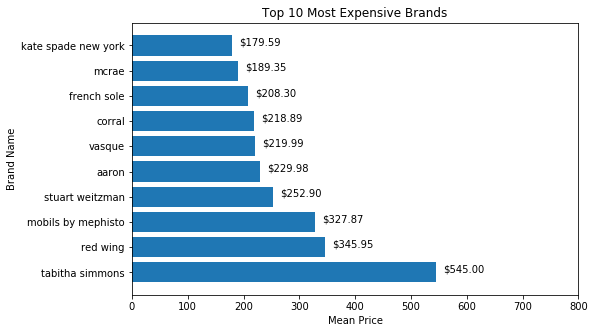

In [48]:
plt.figure(figsize=[8,5])
plt.title('Top 10 Most Expensive Brands')
plt.xlabel('Mean Price')
plt.ylabel('Brand Name')
plt.xlim((0,800))

plt.barh(np.arange(0, 10), top10_expensive.values, tick_label=top10_expensive.index)
locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
    bar_value = top10_expensive[label.get_text()]
    format_value = '${:,.2f}'.format(bar_value)
    plt.text(bar_value + 50, loc, format_value, ha='center') 


In [50]:
# Vertical bar chart
"""
plt.figure(figsize=[8,5])
plt.title('Top 5 Most Expensive Brands')
plt.xlabel('Brand Name')
plt.ylabel('Mean Price')
plt.ylim((0,800))

plt.bar([1,2,3,4,5], top5_expensive.values, tick_label=top5_expensive.index)
locs, labels = plt.xticks(rotation=30)

for loc, label in zip(locs,labels):
    bar_value = top5_expensive[label.get_text()]
    format_value = '${:,.2f}'.format(bar_value)
    plt.text(loc, bar_value + 20, format_value, ha='center')
"""

"\nplt.figure(figsize=[8,5])\nplt.title('Top 5 Most Expensive Brands')\nplt.xlabel('Brand Name')\nplt.ylabel('Mean Price')\nplt.ylim((0,800))\n\nplt.bar([1,2,3,4,5], top5_expensive.values, tick_label=top5_expensive.index)\nlocs, labels = plt.xticks(rotation=30)\n\nfor loc, label in zip(locs,labels):\n    bar_value = top5_expensive[label.get_text()]\n    format_value = '${:,.2f}'.format(bar_value)\n    plt.text(loc, bar_value + 20, format_value, ha='center')\n"

#### Distribution of Price

In [51]:
std_price = df_clean.groupby('brand').std()['mid_price']

In [89]:
top5_widest_dist = std_price.sort_values(ascending=False)[:5]

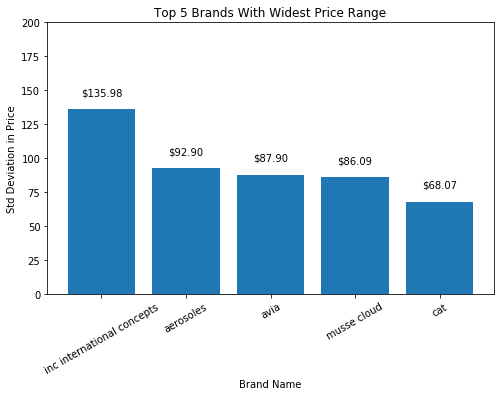

In [90]:
plt.figure(figsize=[8,5])
plt.title('Top 5 Brands With Widest Price Range')
plt.xlabel('Brand Name')
plt.ylabel('Std Deviation in Price')
plt.ylim((0,200))

plt.bar(np.arange(len(top5_widest_dist)), top5_widest_dist.values, tick_label=top5_widest_dist.index)
locs, labels = plt.xticks(rotation=30)

for loc, label in zip(locs,labels):
    bar_value = top5_widest_dist[label.get_text()]
    format_value = '${:,.2f}'.format(bar_value)
    plt.text(loc, bar_value + 10, format_value, ha='center')
    

In [91]:
df_clean['brand'].value_counts()

journee collection       2180
lifestride               1625
brinley co.              1083
aerosoles                 958
easy street               747
propet                    643
pleaser                   556
charles david             499
nike                      463
sas                       455
trotters                  451
skechers                  441
so                        420
new balance               397
soda                      376
dr. scholls               349
croft barrow              315
softwalk                  245
madden                    244
lartiste                  234
sonoma goods for life     227
ellie                     225
drew                      202
apt. 9                    183
ryka                      176
asics                     175
simply vera vera wang     164
city classified           161
candies                   144
spring step               135
                         ... 
latigo                      1
charter club                1
izod      

In [93]:
df_clean[df_clean['brand']=='inc international concepts']

,id,dateAdded,dateUpdated,brand,categories,primaryCategories,colors,imageURLs,manufacturer,manufacturerNumber,...,prices.color,prices.dateAdded,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,mid_price
627,AWpoB5k5AGTnQPR7vYTS,2019-04-29T07:11:41Z,2019-04-29T07:11:41Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,https://i5.walmartimages.com/asr/2393ae3d-9334...,NaN,NaN,...,Black,NaN,2019-04-27T12:59:00.000Z,NaN,Online only,7.5 Standard,https://www.walmart.com/ip/Women-s-Rammee-Cage...,7.5 Standard,https://www.walmart.com/ip/Women-s-Rammee-Cage...,58.00
1021,AWpjJUpPJbEilcB6QOIa,2019-04-28T08:08:57Z,2019-04-28T08:08:57Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Olive,NaN,NaN,NaN,...,Olive,NaN,2019-04-27T12:52:00.000Z,NaN,Online only: 50% off,5,https://www.walmart.com/ip/Inc-International-C...,5,https://www.walmart.com/ip/Inc-International-C...,59.98
1023,AWpjIkr3JbEilcB6QOCg,2019-04-28T08:08:57Z,2019-04-28T08:08:57Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Olive,NaN,NaN,NaN,...,Olive,NaN,2019-04-27T12:52:00.000Z,NaN,Online only: 60% off,9,https://www.walmart.com/ip/Inc-International-C...,9,https://www.walmart.com/ip/Inc-International-C...,47.41
1026,AWpjG13ZAGTnQPR7u6Af,2019-04-28T08:08:56Z,2019-04-28T08:08:56Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Nude,NaN,NaN,NaN,...,Nude,NaN,2019-04-27T12:52:00.000Z,NaN,Online only: 63% off,9,https://www.walmart.com/ip/Inc-International-C...,9,https://www.walmart.com/ip/Inc-International-C...,44.21
1027,AWpjEPEzM263mwCq9uFK,2019-04-28T08:08:56Z,2019-04-28T08:08:56Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,NaN,NaN,...,Black,NaN,2019-04-27T12:52:00.000Z,NaN,Online only: 61% off,7,https://www.walmart.com/ip/Inc-International-C...,7,https://www.walmart.com/ip/Inc-International-C...,46.97
1028,AWpjJubO0U_gzG0hitU1,2019-04-28T08:08:56Z,2019-04-28T08:08:56Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,NaN,NaN,...,Black,NaN,2019-04-27T12:52:00.000Z,NaN,Online only: 67% off,9.5,https://www.walmart.com/ip/Inc-International-C...,9.5,https://www.walmart.com/ip/Inc-International-C...,39.98
1135,AWpi1jOvJbEilcB6QHIG,2019-04-28T07:16:40Z,2019-04-28T07:16:40Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Regal red,NaN,NaN,NaN,...,Regal red,NaN,2019-04-27T13:04:00.000Z,NaN,Online only: 48% off,5,https://www.walmart.com/ip/Inc-International-C...,5,https://www.walmart.com/ip/Inc-International-C...,77.26
1194,AWpi6ecE0U_gzG0hiqrr,2019-04-28T07:07:11Z,2019-04-28T07:07:11Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,New Blush,NaN,NaN,NaN,...,New Blush,NaN,2019-04-27T12:59:00.000Z,NaN,Online only: 67% off,8,https://www.walmart.com/ip/Inc-International-C...,8,https://www.walmart.com/ip/Inc-International-C...,39.98
1302,AWpd6H2MM263mwCq9Wvz,2019-04-27T08:06:01Z,2019-04-27T08:06:01Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black suede,NaN,NaN,NaN,...,Black suede,NaN,2019-04-26T01:39:00.000Z,NaN,Online only: 20% off,8.5,https://www.walmart.com/ip/Inc-International-C...,8.5,https://www.walmart.com/ip/Inc-International-C...,63.60
1681,AWpYg1t_M263mwCq84zb,2019-04-26T07:10:04Z,2019-04-26T07:10:04Z,inc international concepts,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Purple,NaN,NaN,NaN,...,Purple,NaN,2019-04-27T13:04:00.000Z,NaN,Online only: 39% off,7,https://www.walmart.com/ip/Inc-International-C...,7,https://www.walmart.com/ip/Inc-International-C...,90.90


#### Availability

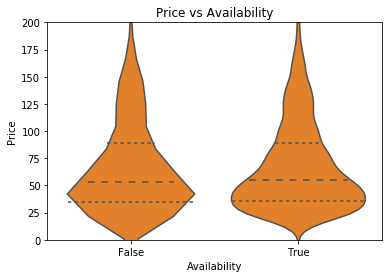

In [54]:
base_color = sns.color_palette()[1]
vp = sns.violinplot(data = df_clean[df_clean['prices.availability'] != -1], x='prices.availability', y='mid_price', color=base_color, inner='quartile')
vp.set_xticklabels([False, True])
vp.set_xlabel('Availability')
vp.set_ylabel('Price')
plt.ylim((0,200))
plt.title('Price vs Availability');

#### Word Cloud

In [94]:
from wordcloud import WordCloud
import matplotlib.image as mpimg

In [61]:
words = ""
for idx, val in df_clean['brand'].iteritems():
    words += val.replace(" ", '') + " "

In [81]:
def generate_word_freq(text):
    splitted_text = text.split(' ')
    unique_words = set(splitted_text)
    # init dict with words as key
    word_freq = {}
    for word in unique_words:
        word_freq[word] = 0
        
    for word in splitted_text:
        word_freq[word] += 1
        
    return word_freq

In [82]:
word_freq = generate_word_freq(words)

In [108]:
mask_img = mpimg.imread('img/mask.jpg')

In [111]:
wordcloud = WordCloud(max_font_size=70, background_color='white', mask=mask_img).generate_from_frequencies(word_freq)

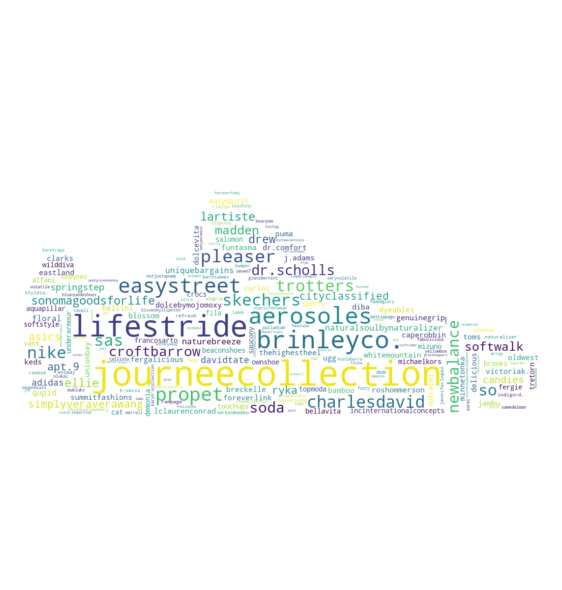

In [112]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 